# Structure de bande de phonons et vitesse du son

Dans le jupyter Notebook suivant, nous allons effectuer le calcul de la vitesse du son pour trois branches acoustiques différentes dans trois directions distinctes de la zone de Brillouin. Nous expliquerons au fur et à mesure les hypothèses de travail et la méthodologie utilisée pour arriver aux résultats présentés.

In [3]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon.bandstructure import PhononBandStructure
import matplotlib.pyplot as plt
import numpy as np

In [4]:
with MPRester("BQb2tXA4gWoqynx7") as mp:
    band = mp.get_phonon_bandstructure_by_material_id("mp-984761")

# Dispersion des phonons

Tout d'abord, commençons par observer la structure de bande des phonons. Les différentes lettres représentent les sommets des directions de la zone de brillouin.

La première figure ci-dessous représente graphiquement la signification de ces directions dans la zone de brillouin.

La seconde figure est la structure de bande représentant les relations de dispersions pour les différentes directions.

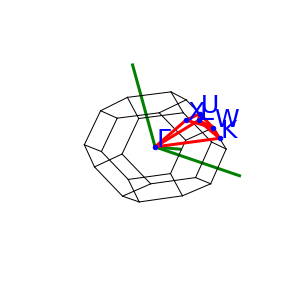

In [5]:
plot = PhononBSPlotter(band)
plot.plot_brillouin()

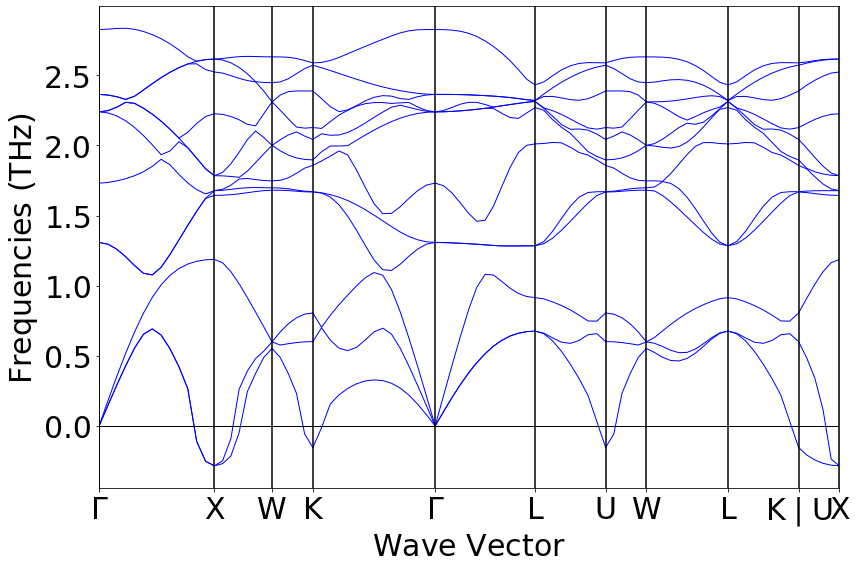

In [6]:
plot.bs_plot_data()
plot.show(units ='thz')

# Approximation linéaire des courbes de dispersion

L'équation liant la pulsation d'un phonon $\omega_k$ à son nombre d'onde k : $\omega_{k} = \sqrt {2\omega ^{2}(1-\cos(ka))}$.

Cette équation est connue sous le nom de relation de dispersion. La courbe ci-contre décrit son comportement.

<img src="images/dispersion.png" width=400 height=400 />

La vitesse de propagation d'un phonon dans le réseau, qui correspond notamment à la vitesse de propagation du son dans un solide, est donnée par la pente de la relation de dispersion. Avec de faibles valeurs de k (c’est-à-dire aux grandes longueurs d'onde), la relation de dispersion est presque linéaire, et la vitesse du son est proche de $\omega a $, indépendamment de la fréquence du phonon.

Pour déterminer la vitesse du son dans les différentes branches acoustiques, nous utiliserons donc l'approximation de Debye qui consiste à adopter pour chacune des branches acoustiques la limite du milieu élastique continu et à 
extrapoler ainsi la relation linéaire $\omega = v_s|q|$ , $v_s$ à toute fréquence,  $v_s$ ́etant la vitesse du son et |q| est la norme du vecteur d'onde.

Pour trouver la vitesse acoustique, il nous suffira de trouver la pente de l'approximation linéaire de la branche que nous considérerons.

<img src="images/lineaire.png" width=800 height=800 />


# Calcul de la vitesse du son dans les branches acoustiques


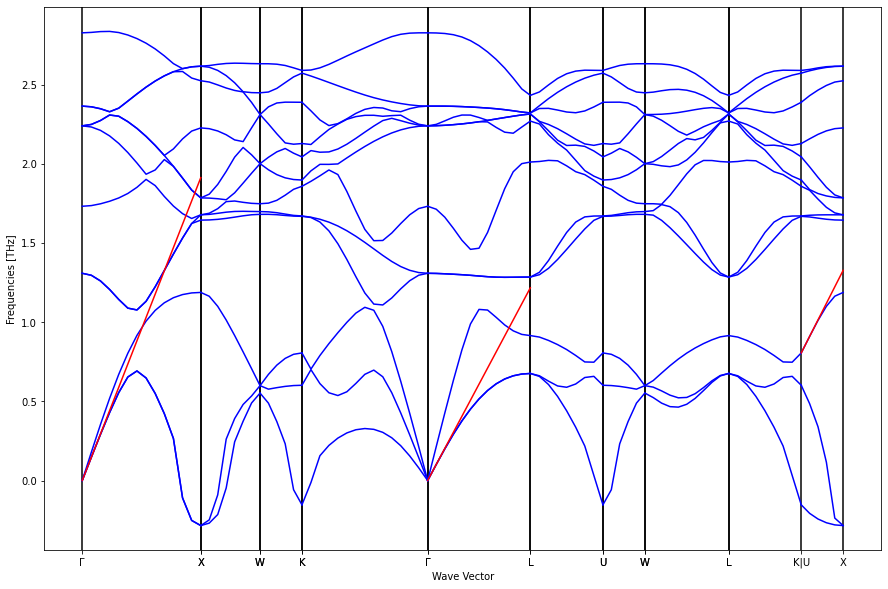

Vitesse du son dans la 2ème branche acoustique, dans la direction Γ - X : 
267.7059334570826 m/s 

Vitesse du son dans la 1ère branche acoustique, dans la direction Γ - L : 
196.72409253333075 m/s 

Vitesse du son dans la 3ème branche acoustique, dans la direction K|U - X : 
206.48980950814249 m/s 



In [7]:
#On récupère les valeurs du vecteur d'onde et les fréquences des différentes bandes 
ticks= plot.get_ticks() 
data = plot.bs_plot_data()

figure,axes = plt.subplots(1,1,figsize=(15,10))


#On trace les axes verticaux
for i in range(len(ticks['distance'])):
    plt.axvline(ticks['distance'][i],0,color="black")
    

#On trace les bandes de dispersion
for i in range(len(data['distances'])):
    for j in range(len(data['frequency'][i])):
        plt.plot(data['distances'][i],data['frequency'][i][j],'b')
        
        
#On nomme les axes
axes.set_xticks(ticks['distance'])
axes.set_xticklabels(['Γ',"",'X',"","W","",'K',"",'Γ',"","L","",'U',"",'W',"","L",'K|U','X'])
axes.set_xlabel('Wave Vector')
axes.set_ylabel('Frequencies [THz]')


#Direction 1

x1 = data['distances'][0]
y1 = data['frequency'][0][1]
slope1 = (y1[1]-y1[0]) /(x1[1]-x1[0]) #Calcul de la pente au début de la courbe
z1 = slope1*(np.array(x1)-x1[0]) + y1[0] #Approximation linéraire
plt.plot(x1,z1, 'r')

#Direction 2

x2 = data['distances'][4]
y2 = data['frequency'][4][0]
slope2 = (y2[1]-y2[0]) /(x2[1]-x2[0]) #Calcul de la pente au début de la courbe
z2 = slope2*(np.array(x2)-x2[0]) +y2[0] #Approximation linéraire
plt.plot(x2, z2, 'r')

#Direction 3
x3 = data['distances'][9]
y3 = data['frequency'][9][2]
slope3 = (y3[1]-y3[0]) /(x3[1]-x3[0]) #Calcul de la pente au début de la courbe
z3 = slope3*np.array(x3-x3[0]) +y3[0] #Approximation linéraire
plt.plot(x3, z3, 'r')

plt.show()

#On doit multiplier la pente par 10*1e12 et 10*1e-10 pour obtenir les unités de vitesse en m/s car les fréquences sont en 
# teraHertz et le vecteur d'onde est exprimé en Angstrom*1e-1 (car on est dans le réseau réciproque)

print("Vitesse du son dans la 2ème branche acoustique, dans la direction Γ - X : \n"+str(slope1*1e2)+" m/s \n")

print("Vitesse du son dans la 1ère branche acoustique, dans la direction Γ - L : \n"+str(slope2*1e2)+" m/s \n")

print("Vitesse du son dans la 3ème branche acoustique, dans la direction K|U - X : \n"+str(slope3*1e2)+" m/s \n")

Comme prévu par la théorie de Debye, il est explicitement visible que les courbes de dispersions suivent une courbe linéaire au début pour ensuite diverger.

# Sources

Syllabus LMAPR1492 de Mr.Piraux, Chapitre 2: "Phonons"

Page Wikipedia : "Phonon" : https://fr.wikipedia.org/wiki/Phonon


Documentation pymatgen.phonon package: https://pymatgen.org/pymatgen.phonon.html
